In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

c:\users\baejinhyun\appdata\local\programs\python\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
zomato = pd.read_csv('./data/zomato_preprocessed_2.csv')
zomato = zomato.assign(order_time=pd.to_datetime(zomato['order_time']))
zomato

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City,pay_amount,is_consistent,afford_ratio,is_gold,ad_revenue
0,543991243,2021-09-01 00:00:51,ygyH_eaSHCTSSgAda33qDLYA,False,True,NaN,NaN,NaN,TGO,67.43,...,False,False,True,13.486,Chennai,53.944,False,20.0,False,5.44
1,543992115,2021-09-01 00:02:50,vagdCBP6L9S461DAPk0tNs-A,False,True,NaN,NaN,NaN,TGO,53.50,...,False,False,True,NaN,Mumbai,53.500,True,NaN,False,9.17
2,543992763,2021-09-01 00:04:26,65RUZmnykIRzyWaqnOaB_EdQ,False,False,LATE_DELIVERY,NaN,VENDOR,TGO,72.99,...,False,False,False,NaN,Chennai,72.990,True,NaN,False,6.92
3,543993755,2021-09-01 00:06:41,THNssTsOurRqOJf9sQEhwiRg,False,True,NaN,NaN,NaN,TGO,206.00,...,False,False,False,NaN,Chennai,206.000,True,NaN,False,5.83
4,543994010,2021-09-01 00:07:13,OGX49Bsq0pR5qB32sT83JhSg,False,True,NaN,NaN,NaN,TGO,100.99,...,False,False,False,NaN,Chennai,100.990,True,NaN,False,7.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118275,644315564,2022-01-02 23:57:08,xdSbyNHiYORwiK2AHYieL5UQ,False,False,CUSTOMER_MISTAKE_ERROR,Changed mind - Mistake / Error,CUSTOMER,TGO,147.49,...,False,False,False,NaN,Chennai,147.490,True,NaN,False,6.62
118276,644315682,2022-01-02 23:57:25,AYeFPGmOUyT4OIWfmTSCYikw,False,True,NaN,NaN,NaN,TGO,110.49,...,False,False,False,NaN,Coimbatore,110.490,True,NaN,False,9.90
118277,644316048,2022-01-02 23:58:05,COnO0tda5iSTa-t5dFFVTpwg,False,False,ONLINE_PAYMENT,NaN,CUSTOMER/PLATFORM,TGO,112.49,...,False,False,False,NaN,Chennai,112.490,True,NaN,False,7.36
118278,644316064,2022-01-02 23:58:07,iI6rRPz2LkRi2Ct0zTaksrOA,False,True,NaN,NaN,NaN,TGO,739.24,...,False,False,False,NaN,Chennai,739.240,True,NaN,False,5.17


In [3]:
success_delivery = zomato[zomato['is_successful']==True]
failed_delivery = zomato[zomato['is_successful']==False]

# Coupon, OrderCount Correlation

In [4]:
success_delivery_for_corr = success_delivery.copy()

success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_freedelivery']==False, 'is_affordable_freedelivery'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_item']==False, 'is_affordable_item'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_gem']==False, 'is_affordable_gem'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_restaurant']==False, 'is_affordable_restaurant'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_voucher']==False, 'is_affordable_voucher'] = np.nan
success_delivery_for_corr

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City,pay_amount,is_consistent,afford_ratio,is_gold,ad_revenue
0,543991243,2021-09-01 00:00:51,ygyH_eaSHCTSSgAda33qDLYA,False,True,NaN,NaN,NaN,TGO,67.43,...,NaN,NaN,True,13.486,Chennai,53.944,False,20.0,False,5.44
1,543992115,2021-09-01 00:02:50,vagdCBP6L9S461DAPk0tNs-A,False,True,NaN,NaN,NaN,TGO,53.50,...,NaN,NaN,True,NaN,Mumbai,53.500,True,NaN,False,9.17
3,543993755,2021-09-01 00:06:41,THNssTsOurRqOJf9sQEhwiRg,False,True,NaN,NaN,NaN,TGO,206.00,...,NaN,NaN,False,NaN,Chennai,206.000,True,NaN,False,5.83
4,543994010,2021-09-01 00:07:13,OGX49Bsq0pR5qB32sT83JhSg,False,True,NaN,NaN,NaN,TGO,100.99,...,NaN,NaN,False,NaN,Chennai,100.990,True,NaN,False,7.41
5,543995285,2021-09-01 00:10:21,NiPNR-NifZRviafzNw9WMEkg,False,True,NaN,NaN,NaN,TGO,228.11,...,NaN,NaN,True,NaN,Delhi,228.110,True,NaN,False,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118273,644314669,2022-01-02 23:55:09,RyZAMq2ec2TpeHLJ21bSCyiA,False,True,NaN,NaN,NaN,TGO,141.99,...,NaN,NaN,False,NaN,Chennai,141.990,True,NaN,False,5.42
118274,644315424,2022-01-02 23:56:48,UiiaJ3k-sZR2-0lYkqGXuZBg,False,True,NaN,NaN,NaN,TGO,96.99,...,NaN,NaN,False,NaN,Gurgaon,96.990,True,NaN,True,NaN
118276,644315682,2022-01-02 23:57:25,AYeFPGmOUyT4OIWfmTSCYikw,False,True,NaN,NaN,NaN,TGO,110.49,...,NaN,NaN,False,NaN,Coimbatore,110.490,True,NaN,False,9.90
118278,644316064,2022-01-02 23:58:07,iI6rRPz2LkRi2Ct0zTaksrOA,False,True,NaN,NaN,NaN,TGO,739.24,...,NaN,NaN,False,NaN,Chennai,739.240,True,NaN,False,5.17


In [5]:
by_customer_count = success_delivery_for_corr.groupby('analytical_customer_id').count()[['is_affordable_freedelivery', 'is_affordable_item', 'is_affordable_gem', 
                                                                                         'is_affordable_restaurant', 'is_affordable_voucher', 'order_id']]
by_customer_count = by_customer_count.rename(columns={'is_affordable_freedelivery':'freedelivery', 
                                                      'is_affordable_item':'item', 
                                                      'is_affordable_gem':'gem', 
                                                      'is_affordable_restaurant':'restaurant',
                                                      'is_affordable_voucher':'voucher',
                                                      'order_id':'order_count'})
by_customer_count

,freedelivery,item,gem,restaurant,voucher,order_count
analytical_customer_id,,,,,,
0-4ImcwasFRtaAquwJ2uYhwQ,0,0,0,0,0,1
0-4cZutO5WRNOZM4t5lHp_yQ,0,0,0,0,1,5
0-6kezqWu6RNW65Qqd9p-0KQ,0,0,0,0,0,1
0-QdgcyCbrT3Ca-wyteQXQzw,0,0,0,0,0,1
000rjpX6uhTU6gYcXqhmsbiA,0,0,0,0,1,1
...,...,...,...,...,...,...
zxcS6ybyTgQDye6kbY45xDuw,0,0,0,0,1,1
zy2Seop-MVRI-oHbpOa9eSEQ,0,0,0,0,0,1
zyjOsCm-CkQ2-XZamK_C8T_Q,0,0,0,0,1,1


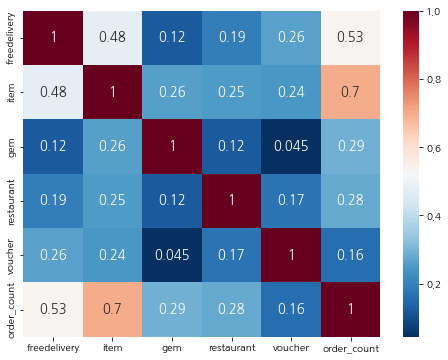

In [6]:
plt.figure(figsize=(8,6))
by_customer_corr = by_customer_count.corr()
sns.heatmap(by_customer_corr, cmap='RdBu_r', annot=True, annot_kws={"size": 13})
plt.show()

# RFM 

- **Number of Order** : COUNTD([Order Id]) <- 이 부분 성공으로 한정 시켜야함
</br></br>
- **Recency** : DATEDIFF('day',{ FIXED [Analytical Customer Id],year([Order Time]): MAX([Order Time])}, [Max Order Date of the Month])+1
- **Frequency** : {FIXED [Analytical Customer Id] ,year([Order Time]) : [Number of Order]}
- **Monetary** : {FIXED [Analytical Customer Id], year([Order Time]): SUM([Pay Amount])}
</br></br>
- **Recency Score** : if [Recency] >= { FIXED year([Order Time]): PERCENTILE([Recency], 0.75)} then 1 </br> ELSEIF [Recency] >= { FIXED year([Order Time]): PERCENTILE([Recency],0.5)} then 2 </br> ELSEIF [Recency] >= { FIXED year([Order Time]): PERCENTILE([Recency],0.25)} then 3 </br> else 4 end
- **Frequency Score** if [Frequency] >= { FIXED year([Order Time]): PERCENTILE([Frequency],0.75)} then 4 </br> ELSEIF [Frequency] >= { FIXED year([Order Time]): PERCENTILE([Frequency],0.5)} then 3  </br> ELSEIF [Frequency] >= { FIXED year([Order Time]): PERCENTILE([Frequency],0.25)} then 2  </br> else 1 end
- **Monetary Score** : if [Monetary] >= { FIXED year([Order Time]): PERCENTILE([Monetary],0.75)} then 4 </br> ELSEIF [Monetary] >= { FIXED year([Order Time]): PERCENTILE([Monetary],0.5)} then 3 </br> ELSEIF [Monetary] >= { FIXED year([Order Time]): PERCENTILE([Monetary],0.25)} then 2 </br> else 1 end
</br></br>
- **RFM score** : [Frequency Score] + [Monetary Score] + [Recency Score]
- **RFM** : STR([Recency Score]) +STR([Frequency Score]) + STR([Monetary Score])

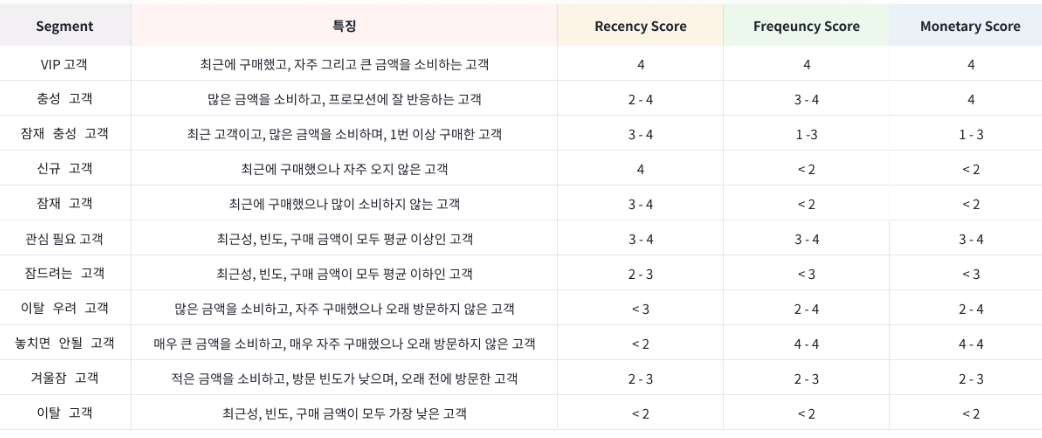

In [7]:
Image('./data/RFM.png', width=800, height=500)

- IF [Frequency Score]>= 4 and [Monetary Score]>= 4 and [Recency Score]>= 4 then **VIP 고객**
- ELSEIF [Recency Score]>=2 and [Recency Score]<=4 and [Frequency Score]>=3 and [Frequency Score]<=4 and [Monetary Score]>=4 then **충성 고객**
- ELSEIF [Recency Score]>=3 and [Frequency Score]>=1 and [Frequency Score]<=3 and [Monetary Score]>=1 and [Monetary Score]<=3 then **잠재 충성 고객**
- ELSEIF [Recency Score]>=4 and [Frequency Score]<2 and [Monetary Score]<2 then **신규 고객**
- ELSEIF [Recency Score]>=3 and [Recency Score]<=4 and [Frequency Score]<2 and [Monetary Score]<2 then **잠재 고객**
- ELSEIF [Recency Score]>=3 and [Recency Score]<=4 and [Frequency Score]>=3 and [Frequency Score]<=4 and [Monetary Score]>=3 and [Monetary Score]<=4 then **관심 필요 고객**
- ELSEIF [Recency Score]>=2 and [Recency Score]<=3 and [Frequency Score]<3 and [Monetary Score]<3 then **잠드려는 고객**
- ELSEIF [Recency Score]<3 and [Frequency Score]>=2 and [Frequency Score]<=4 and [Monetary Score]>=2 and [Monetary Score]<=4 then **이탈 우려 고객**
- ELSEIF [Recency Score]<2 and [Frequency Score]>=4 and [Monetary Score]>=4  then **놓치면 안되는 고객**
- ELSEIF [Recency Score]>=2 and [Recency Score]<=3 and [Frequency Score]>=2 and [Frequency Score]<=3 and [Monetary Score]>=2 and [Monetary Score]<=3 then **겨울잠 고객**
- ELSEIF [Recency Score]<2 and [Frequency Score]<2 and [Monetary Score]<2  then **이탈 고객**
- END

In [8]:
success_delivery_2021 = success_delivery[success_delivery['order_time']<pd.to_datetime('2022-01-01')]
success_delivery_2021

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City,pay_amount,is_consistent,afford_ratio,is_gold,ad_revenue
0,543991243,2021-09-01 00:00:51,ygyH_eaSHCTSSgAda33qDLYA,False,True,NaN,NaN,NaN,TGO,67.43,...,False,False,True,13.486,Chennai,53.944,False,20.00,False,5.44
1,543992115,2021-09-01 00:02:50,vagdCBP6L9S461DAPk0tNs-A,False,True,NaN,NaN,NaN,TGO,53.50,...,False,False,True,NaN,Mumbai,53.500,True,NaN,False,9.17
3,543993755,2021-09-01 00:06:41,THNssTsOurRqOJf9sQEhwiRg,False,True,NaN,NaN,NaN,TGO,206.00,...,False,False,False,NaN,Chennai,206.000,True,NaN,False,5.83
4,543994010,2021-09-01 00:07:13,OGX49Bsq0pR5qB32sT83JhSg,False,True,NaN,NaN,NaN,TGO,100.99,...,False,False,False,NaN,Chennai,100.990,True,NaN,False,7.41
5,543995285,2021-09-01 00:10:21,NiPNR-NifZRviafzNw9WMEkg,False,True,NaN,NaN,NaN,TGO,228.11,...,False,False,True,NaN,Delhi,228.110,True,NaN,False,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116424,642643715,2021-12-31 23:48:10,v8uxxmwmTlShmmihweXprLWA,False,True,NaN,NaN,NaN,TGO,98.99,...,False,False,False,NaN,Chennai,98.990,True,NaN,False,9.45
116425,642644354,2021-12-31 23:49:18,VoqoDDDyxPRVyxeUD2hJljdw,False,True,NaN,NaN,NaN,TGO,121.49,...,False,False,False,NaN,Chennai,121.490,True,NaN,True,NaN
116426,642646321,2021-12-31 23:52:44,FC3bsdIywEQ9yo68IGc6wwNA,False,True,NaN,NaN,NaN,TGO,98.85,...,False,False,True,NaN,Chennai,98.850,True,NaN,True,NaN
116428,642647977,2021-12-31 23:55:39,l8Eg-pveIiTPef7zvUtXBOwA,False,True,NaN,NaN,NaN,TGO,186.65,...,False,False,True,77.000,Chennai,159.650,False,32.54,False,5.88


## Recency

In [9]:
max_order_time = success_delivery_2021['order_time'].max()
success_delivery_2021_last_order_time = success_delivery_2021.groupby('analytical_customer_id')['order_time'].max().reset_index()
success_delivery_2021_recency = success_delivery_2021_last_order_time.assign(date_diff= max_order_time - success_delivery_2021_last_order_time['order_time'])
success_delivery_2021_recency = success_delivery_2021_recency.assign(recency = success_delivery_2021_recency['date_diff'].astype(str).str.split(' days').str.get(0).astype(int))
success_delivery_2021_recency

,analytical_customer_id,order_time,date_diff,recency
0,0-4ImcwasFRtaAquwJ2uYhwQ,2021-09-06 02:02:01,116 days 21:54:43,116
1,0-4cZutO5WRNOZM4t5lHp_yQ,2021-12-27 10:53:27,4 days 13:03:17,4
2,0-6kezqWu6RNW65Qqd9p-0KQ,2021-11-18 21:58:08,43 days 01:58:36,43
3,0-QdgcyCbrT3Ca-wyteQXQzw,2021-10-01 17:57:46,91 days 05:58:58,91
4,000rjpX6uhTU6gYcXqhmsbiA,2021-09-03 01:01:06,119 days 22:55:38,119
...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,2021-11-02 15:20:33,59 days 08:36:11,59
13137,zy2Seop-MVRI-oHbpOa9eSEQ,2021-09-24 20:01:26,98 days 03:55:18,98
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,2021-10-09 22:16:17,83 days 01:40:27,83
13139,zzu1rDr62_S_6SzqrMOrJz1w,2021-12-27 11:38:25,4 days 12:18:19,4


## Frequency

In [10]:
success_delivery_2021_frequency = success_delivery_2021.groupby('analytical_customer_id')['order_id'].count().reset_index()
success_delivery_2021_frequency = success_delivery_2021_frequency.rename(columns={'order_id':'frequency'})
success_delivery_2021_frequency

,analytical_customer_id,frequency
0,0-4ImcwasFRtaAquwJ2uYhwQ,1
1,0-4cZutO5WRNOZM4t5lHp_yQ,4
2,0-6kezqWu6RNW65Qqd9p-0KQ,1
3,0-QdgcyCbrT3Ca-wyteQXQzw,1
4,000rjpX6uhTU6gYcXqhmsbiA,1
...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,1
13137,zy2Seop-MVRI-oHbpOa9eSEQ,1
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,1
13139,zzu1rDr62_S_6SzqrMOrJz1w,14


## Monetary

In [11]:
import warnings
warnings.filterwarnings('ignore')

# delivery_profit
success_delivery_2021.loc[success_delivery_2021['delivery_arrangement']=='TGO', 'delivery_profit'] = success_delivery_2021['delivery_fee_amount_lc'] * 0.76
success_delivery_2021.loc[success_delivery_2021['delivery_arrangement']=='TMP', 'delivery_profit'] = 0

# state_profit
success_delivery_2021.loc[success_delivery_2021['City'].isin(['Chennai', 'Delhi']), 'state_profit'] = 0.05
success_delivery_2021.loc[~success_delivery_2021['City'].isin(['Chennai', 'Delhi']), 'state_profit'] = 0

# store_profit
success_delivery_2021.loc[success_delivery_2021['vertical_class']=='food', 'store_profit'] = success_delivery_2021['basket_amount_lc'] * 0.2
success_delivery_2021.loc[success_delivery_2021['vertical_class']=='non-food', 'store_profit'] = success_delivery_2021['basket_amount_lc'] * 0.15

# order_profit
success_delivery_2021 = success_delivery_2021.assign(order_profit=3)

# gold_fee
# -> 이거는 groupby 하면서 계산할 것

In [12]:
success_delivery_2021_forgroup = success_delivery_2021.copy()
success_delivery_2021_forgroup = success_delivery_2021.assign(order_month=success_delivery_2021['order_time'].dt.strftime('%Y-%m'))
success_delivery_2021_forgroup = success_delivery_2021_forgroup[['order_id', 'analytical_customer_id', 'order_month', 'is_gold',
                                                                 'delivery_profit', 'state_profit', 'store_profit', 'order_profit', 'ad_revenue']]
success_delivery_2021_forgroup = success_delivery_2021_forgroup.fillna(0)
success_delivery_2021_forgroup

,order_id,analytical_customer_id,order_month,is_gold,delivery_profit,state_profit,store_profit,order_profit,ad_revenue
0,543991243,ygyH_eaSHCTSSgAda33qDLYA,2021-09,False,11.3924,0.05,10.4880,3,5.44
1,543992115,vagdCBP6L9S461DAPk0tNs-A,2021-09,False,0.0000,0.00,10.7000,3,9.17
3,543993755,THNssTsOurRqOJf9sQEhwiRg,2021-09,False,7.5924,0.05,39.2020,3,5.83
4,543994010,OGX49Bsq0pR5qB32sT83JhSg,2021-09,False,3.7924,0.05,19.2000,3,7.41
5,543995285,NiPNR-NifZRviafzNw9WMEkg,2021-09,False,0.0000,0.05,45.6220,3,6.99
...,...,...,...,...,...,...,...,...,...
116424,642643715,v8uxxmwmTlShmmihweXprLWA,2021-12,False,7.5924,0.05,17.8000,3,9.45
116425,642644354,VoqoDDDyxPRVyxeUD2hJljdw,2021-12,True,3.7924,0.05,23.3000,3,0.00
116426,642646321,FC3bsdIywEQ9yo68IGc6wwNA,2021-12,True,0.0000,0.05,14.8275,3,0.00
116428,642647977,l8Eg-pveIiTPef7zvUtXBOwA,2021-12,False,0.0000,0.05,35.4975,3,5.88


In [13]:
success_delivery_2021_by_id = success_delivery_2021_forgroup.groupby('analytical_customer_id')[['delivery_profit', 'state_profit', 'store_profit', 'order_profit', 'ad_revenue']].sum().reset_index()
success_delivery_2021_goldprofit = success_delivery_2021_forgroup[success_delivery_2021_forgroup['is_gold']==True].groupby('analytical_customer_id')['order_month'].nunique().reset_index()
success_delivery_2021_goldprofit = success_delivery_2021_goldprofit.assign(order_month = success_delivery_2021_goldprofit['order_month']*333)
success_delivery_2021_goldprofit = success_delivery_2021_goldprofit.rename(columns={'order_month':'gold_profit'})
success_delivery_2021_profit = success_delivery_2021_by_id.merge(success_delivery_2021_goldprofit, how='left', on='analytical_customer_id')
success_delivery_2021_profit = success_delivery_2021_profit.fillna(0)
success_delivery_2021_profit

,analytical_customer_id,delivery_profit,state_profit,store_profit,order_profit,ad_revenue,gold_profit
0,0-4ImcwasFRtaAquwJ2uYhwQ,0.0000,0.05,17.200,3,5.25,0.0
1,0-4cZutO5WRNOZM4t5lHp_yQ,12.1296,0.00,44.194,12,23.70,0.0
2,0-6kezqWu6RNW65Qqd9p-0KQ,3.7924,0.05,64.000,3,5.39,0.0
3,0-QdgcyCbrT3Ca-wyteQXQzw,0.0000,0.05,30.400,3,5.93,0.0
4,000rjpX6uhTU6gYcXqhmsbiA,3.7924,0.05,38.000,3,7.90,0.0
...,...,...,...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,7.5924,0.05,24.000,3,5.54,0.0
13137,zy2Seop-MVRI-oHbpOa9eSEQ,0.0000,0.05,21.696,3,7.13,0.0
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,7.5924,0.05,24.000,3,9.46,0.0
13139,zzu1rDr62_S_6SzqrMOrJz1w,65.3144,0.70,571.714,42,22.39,1332.0


In [14]:
success_delivery_2021_monetary = success_delivery_2021_profit.assign(profit=success_delivery_2021_profit.sum(axis=1))
success_delivery_2021_monetary = success_delivery_2021_monetary.rename(columns={'profit':'monetary'})
success_delivery_2021_monetary

,analytical_customer_id,delivery_profit,state_profit,store_profit,order_profit,ad_revenue,gold_profit,monetary
0,0-4ImcwasFRtaAquwJ2uYhwQ,0.0000,0.05,17.200,3,5.25,0.0,25.5000
1,0-4cZutO5WRNOZM4t5lHp_yQ,12.1296,0.00,44.194,12,23.70,0.0,92.0236
2,0-6kezqWu6RNW65Qqd9p-0KQ,3.7924,0.05,64.000,3,5.39,0.0,76.2324
3,0-QdgcyCbrT3Ca-wyteQXQzw,0.0000,0.05,30.400,3,5.93,0.0,39.3800
4,000rjpX6uhTU6gYcXqhmsbiA,3.7924,0.05,38.000,3,7.90,0.0,52.7424
...,...,...,...,...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,7.5924,0.05,24.000,3,5.54,0.0,40.1824
13137,zy2Seop-MVRI-oHbpOa9eSEQ,0.0000,0.05,21.696,3,7.13,0.0,31.8760
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,7.5924,0.05,24.000,3,9.46,0.0,44.1024
13139,zzu1rDr62_S_6SzqrMOrJz1w,65.3144,0.70,571.714,42,22.39,1332.0,2034.1184


## Merge RFM

In [15]:
Recency = success_delivery_2021_recency[['analytical_customer_id', 'recency']]
Frequency = success_delivery_2021_frequency[['analytical_customer_id', 'frequency']]
Monetary = success_delivery_2021_monetary[['analytical_customer_id', 'monetary']]

In [16]:
RFM = Recency.merge(Frequency, how='left', on='analytical_customer_id').merge(Monetary, how='left', on='analytical_customer_id')
RFM

,analytical_customer_id,recency,frequency,monetary
0,0-4ImcwasFRtaAquwJ2uYhwQ,116,1,25.5000
1,0-4cZutO5WRNOZM4t5lHp_yQ,4,4,92.0236
2,0-6kezqWu6RNW65Qqd9p-0KQ,43,1,76.2324
3,0-QdgcyCbrT3Ca-wyteQXQzw,91,1,39.3800
4,000rjpX6uhTU6gYcXqhmsbiA,119,1,52.7424
...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,59,1,40.1824
13137,zy2Seop-MVRI-oHbpOa9eSEQ,98,1,31.8760
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,83,1,44.1024
13139,zzu1rDr62_S_6SzqrMOrJz1w,4,14,2034.1184


In [17]:
RFM_des = RFM.describe()

In [23]:
# recency_score
RFM.loc[RFM['recency']>=RFM_des['recency']['75%'], 'recency_score'] = 1
RFM.loc[(RFM['recency']>=RFM_des['recency']['50%']) & (RFM['recency']<RFM_des['recency']['75%']), 'recency_score'] = 2
RFM.loc[(RFM['recency']>=RFM_des['recency']['25%']) & (RFM['recency']<RFM_des['recency']['50%']), 'recency_score'] = 3
RFM.loc[RFM['recency'] < RFM_des['recency']['25%'], 'recency_score'] = 4

# frequency_score
RFM.loc[RFM['frequency']>=RFM_des['frequency']['75%'], 'frequency_score'] = 4
RFM.loc[(RFM['frequency']>=RFM_des['frequency']['50%']) & (RFM['frequency']<RFM_des['frequency']['75%']), 'frequency_score'] = 3
RFM.loc[(RFM['frequency']>=RFM_des['frequency']['25%']) & (RFM['frequency']<RFM_des['frequency']['50%']), 'frequency_score'] = 2
RFM.loc[RFM['frequency'] < RFM_des['frequency']['25%'], 'frequency_score'] = 1

# monetary_score
RFM.loc[RFM['monetary']>=RFM_des['monetary']['75%'], 'monetary_score'] = 4
RFM.loc[(RFM['monetary']>=RFM_des['monetary']['50%']) & (RFM['monetary']<RFM_des['monetary']['75%']), 'monetary_score'] = 3
RFM.loc[(RFM['monetary']>=RFM_des['monetary']['25%']) & (RFM['monetary']<RFM_des['monetary']['50%']), 'monetary_score'] = 2
RFM.loc[RFM['monetary'] < RFM_des['monetary']['25%'], 'monetary_score'] = 1

RFM[['recency_score', 'frequency_score', 'monetary_score']] = RFM[['recency_score', 'frequency_score', 'monetary_score']].astype(int)
RFM = RFM.assign(RFM_score=RFM['recency_score'].astype(str) + RFM['frequency_score'].astype(str) + RFM['monetary_score'].astype(str))
RFM = RFM.set_index('analytical_customer_id')

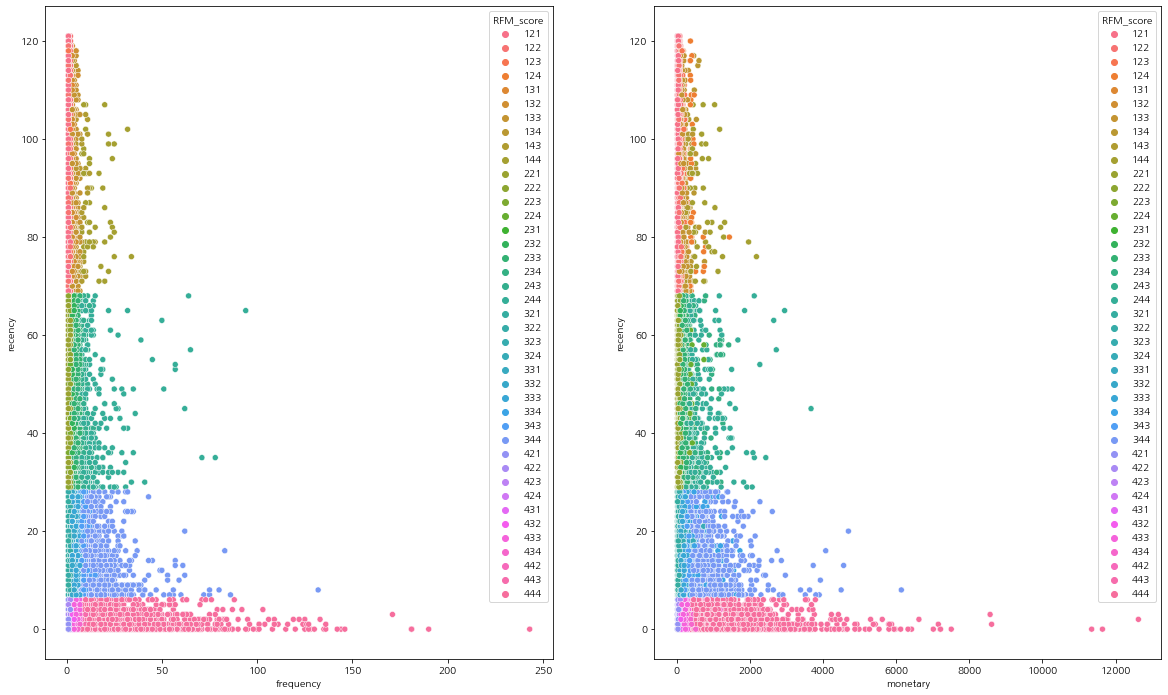

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(20,12))
sns.scatterplot(data=RFM, x='frequency', y='recency', hue='RFM_score', hue_order=sorted(RFM.RFM_score.unique()), ax=axes[0])
sns.scatterplot(data=RFM, x='monetary', y='recency', hue='RFM_score', hue_order=sorted(RFM.RFM_score.unique()), ax=axes[1])
plt.show()

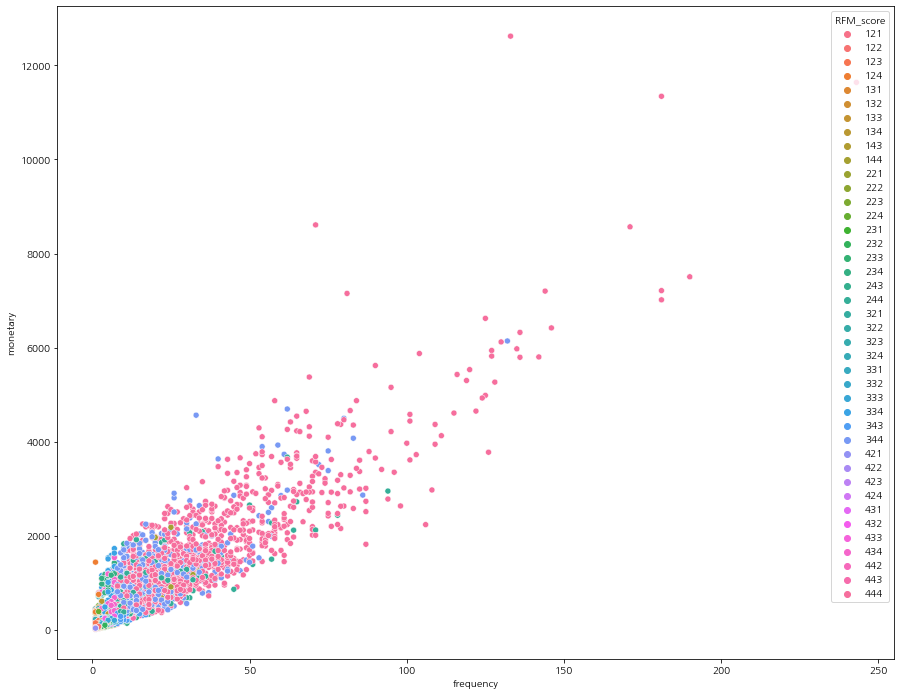

In [162]:
plt.figure(figsize=(15,12))
sns.scatterplot(data=RFM, x='frequency', y='monetary', hue='RFM_score', hue_order=sorted(RFM.RFM_score.unique()))
plt.show()